In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
artists_df = pd.read_json('data/data_v2/artists.jsonl')
sessions_df = pd.read_json('data/data_v2/sessions.jsonl')
tracks_df = pd.read_json('data/data_v2/tracks.jsonl')
users_df = pd.read_json('data/data_v2/users.jsonl')

Sprawdzamy, czy wszystkie dane są prawidłowe. Jeśli nie, to wiersze z śmieciowymi danymi są usuwane.

In [35]:
artists_df.isnull().sum()

id        0
name      0
genres    0
dtype: int64

In [36]:
sessions_df.isnull().sum()

session_id        0
timestamp         0
user_id           0
track_id      15700
event_type        0
dtype: int64

In [37]:
tracks_df.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
id_artist           0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64

In [38]:
users_df.isnull().sum() 

user_id             0
name                0
city                0
street              0
favourite_genres    0
premium_user        0
dtype: int64

Jedynym zbiorem danych gdzie występowały nulle, jest zbiór sesji. Brakujące dane wynikają z pojawiających się reklam w naszym serwisie. Te dane nie będą nam potrzebne, więc je usuwamy.

In [39]:
sessions_df.dropna(inplace=True)

Informacje o typach dla kolumn w danych tabelach.

In [40]:
artists_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1667 non-null   object
 1   name    1667 non-null   object
 2   genres  1667 non-null   object
dtypes: object(3)
memory usage: 39.2+ KB


In [41]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99326 entries, 0 to 115025
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   session_id  99326 non-null  int64         
 1   timestamp   99326 non-null  datetime64[ns]
 2   user_id     99326 non-null  int64         
 3   track_id    99326 non-null  object        
 4   event_type  99326 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.5+ MB


In [42]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22412 entries, 0 to 22411
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                22412 non-null  object 
 1   name              22412 non-null  object 
 2   popularity        22412 non-null  int64  
 3   duration_ms       22412 non-null  int64  
 4   explicit          22412 non-null  int64  
 5   id_artist         22412 non-null  object 
 6   release_date      22412 non-null  object 
 7   danceability      22412 non-null  float64
 8   energy            22412 non-null  float64
 9   key               22412 non-null  int64  
 10  loudness          22412 non-null  float64
 11  speechiness       22412 non-null  float64
 12  acousticness      22412 non-null  float64
 13  instrumentalness  22412 non-null  float64
 14  liveness          22412 non-null  float64
 15  valence           22412 non-null  float64
 16  tempo             22412 non-null  float6

In [43]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           2000 non-null   int64 
 1   name              2000 non-null   object
 2   city              2000 non-null   object
 3   street            2000 non-null   object
 4   favourite_genres  2000 non-null   object
 5   premium_user      2000 non-null   bool  
dtypes: bool(1), int64(1), object(4)
memory usage: 80.2+ KB


Wymiarowość danych.

In [44]:
artists_df.shape

(1667, 3)

In [45]:
sessions_df.shape

(99326, 5)

In [46]:
tracks_df.shape

(22412, 17)

In [47]:
users_df.shape

(2000, 6)

Podgląd do 10 próbek dla wszystkich zbiorów danych.

In [48]:
artists_df.head(10)

,id,name,genres
0,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,"[country rap, lgbtq+ hip hop, pop rap, queer c..."
1,0xRXCcSX89eobfrshSVdyu,MEDUZA,"[dance pop, edm, pop dance, pop house, tropica..."
2,3OKg7YbOIatODzkRIbLJR4,TheFatRat,[speedrun]
3,4f7KfxeHq9BiylGmyXepGt,Tanishk Bagchi,"[desi pop, filmi, modern bollywood]"
4,56mfhUDKa1vec6rSLZV5Eg,Jawsh 685,[nz pop]
5,523y9KSneKh6APd1hKxLuF,Master KG,[south african house]
6,25UNJbwGZSQKvz5cPLWlv3,Los Dos Carnales,"[corrido, norteno, nuevo regional mexicano, re..."
7,6vTqEFbTtTRJsuIpzZgjxi,Grupo Menos É Mais,"[pagode, pagode novo]"
8,44mEtidu0VdRkIqO4IbkNa,Marca MP,"[corrido, corridos tumbados, nuevo regional me..."
9,6m6e7D2TnV0aYMllFFwMxu,Guilherme & Benuto,[sertanejo pop]


In [49]:
sessions_df.head(10)

,session_id,timestamp,user_id,track_id,event_type
0,124,2022-06-05 06:07:33.000,101,6dGsBRuavumBs5BghcXF3D,play
1,125,2023-03-14 16:48:46.360,101,1dDfNKasu3ETniVIYLAZNM,play
2,125,2023-03-14 16:54:02.067,101,18Gcl5bxdd8bpBhWOj1rCR,play
4,126,2022-05-22 17:27:32.000,101,3muBQDekYAg7jm6hDu6R0Z,play
5,126,2022-05-22 17:27:43.743,101,3muBQDekYAg7jm6hDu6R0Z,like
6,127,2022-10-02 20:43:00.951,101,2fHOqQ9K6eY0wsbVZiYZPw,play
7,127,2022-10-02 20:46:37.387,101,1RywwImkBFUEVcRTBmw7vL,play
8,127,2022-10-02 20:48:03.597,101,1RywwImkBFUEVcRTBmw7vL,skip
9,127,2022-10-02 20:48:08.597,101,2SmlWvdYG6FsagxN3FkHMI,play
10,127,2022-10-02 20:52:46.029,101,4TnUKixNWMfajncgdSwFoi,play


In [50]:
tracks_df.head(10)

,id,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.586,0.000000,0.332,0.7130,88.973
1,2W889aLIKxULEefrleFBFI,Someone to Watch Over Me,54,198000,0,1Mxqyy3pSjf8kZZL4QVxS0,1943,0.204,0.1510,2,-17.842,0.0418,0.947,0.000009,0.321,0.1340,91.783
2,4Pnzw1nLOpDNV6MKI5ueIR,Nancy (With the Laughing Face) - 78rpm Version,55,199000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.295,0.0826,1,-19.569,0.0367,0.984,0.000358,0.156,0.1690,128.600
3,7GLmfKOe5BfOXk7334DoKt,Saturday Night (Is The Loneliest Night In The ...,54,163000,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.561,0.3350,9,-11.093,0.0499,0.840,0.000002,0.788,0.5900,126.974
4,6kD1SNGPkfX9LwaGd1FG92,Put Your Dreams Away (For Another Day),53,186173,0,1Mxqyy3pSjf8kZZL4QVxS0,1944,0.197,0.0546,1,-22.411,0.0346,0.950,0.276000,0.152,0.1000,90.150
5,5RcvlmVx2xtFcp2Ta5pw7X,Someone To Watch Over Me,57,196667,0,5V0MlUE1Bft0mbLlND7FJz,1950-09-11,0.354,0.0851,7,-13.738,0.0345,0.990,0.000004,0.123,0.1970,97.684
6,5DIVWgTeJ2fPIxaY9e7ZKn,I've Got A Crush On You,56,196440,0,5V0MlUE1Bft0mbLlND7FJz,1950-09-11,0.455,0.1060,2,-14.086,0.0422,0.986,0.000000,0.122,0.2580,66.807
7,0x0ffSAP6PkdoDgHOfroof,My Funny Valentine - Remastered,54,150667,0,1Mxqyy3pSjf8kZZL4QVxS0,1954-01-01,0.257,0.1250,11,-14.267,0.0332,0.891,0.000000,0.108,0.2450,84.930
8,0Hsc0sIaxOxXBZbT3ms2oj,In The Wee Small Hours Of The Morning - Remast...,60,180933,0,1Mxqyy3pSjf8kZZL4QVxS0,1955,0.290,0.0874,0,-16.119,0.0346,0.856,0.000957,0.109,0.0734,114.997
9,3aEJMh1cXKEjgh52claxQp,I've Got You Under My Skin - Remastered 1998,68,223760,0,1Mxqyy3pSjf8kZZL4QVxS0,1956-03,0.585,0.2470,1,-12.612,0.0400,0.452,0.000009,0.107,0.5910,127.150


In [51]:
users_df.head(10)

,user_id,name,city,street,favourite_genres,premium_user
0,101,Dominik Paździora,Wrocław,aleja Jabłoniowa 55/02,"[dance pop, latin, hard rock]",False
1,102,Justyna Mszyca,Poznań,ul. Krótka 710,"[reggaeton, latin arena pop, modern rock]",False
2,103,Kornelia Witka,Gdynia,al. Kościuszki 587,"[rap, art rock, rock]",False
3,104,Jędrzej Kotala,Gdynia,pl. Kossaka 97/86,"[mexican pop, contemporary country, psychedeli...",False
4,105,Karol Kleban,Kraków,ul. Tulipanowa 861,"[rock, adult standards, permanent wave]",False
5,106,Julianna Kaczan,Wrocław,ul. Kołłątaja 68,"[ranchera, canadian pop, pop]",False
6,107,Anastazja Melcer,Kraków,plac Niecała 28,"[folk rock, dance pop, regional mexican]",False
7,108,Eryk Tylek,Warszawa,pl. Czereśniowa 601,"[adult standards, dance pop, latin pop]",False
8,109,Mateusz Czulak,Radom,ul. Azaliowa 60/54,"[electropop, latin arena pop, latin]",True
9,110,Szymon Luberda,Kraków,aleja Wiśniowa 25/31,"[rock, reggaeton, hard rock]",True


Poniżej zamieściłem wykresy z 50 najpopularniejszymi gatunkami wśród artystów i użytkowników.

<Axes: title={'center': 'Most popular artists genres'}, xlabel='Popularity', ylabel='Genre'>

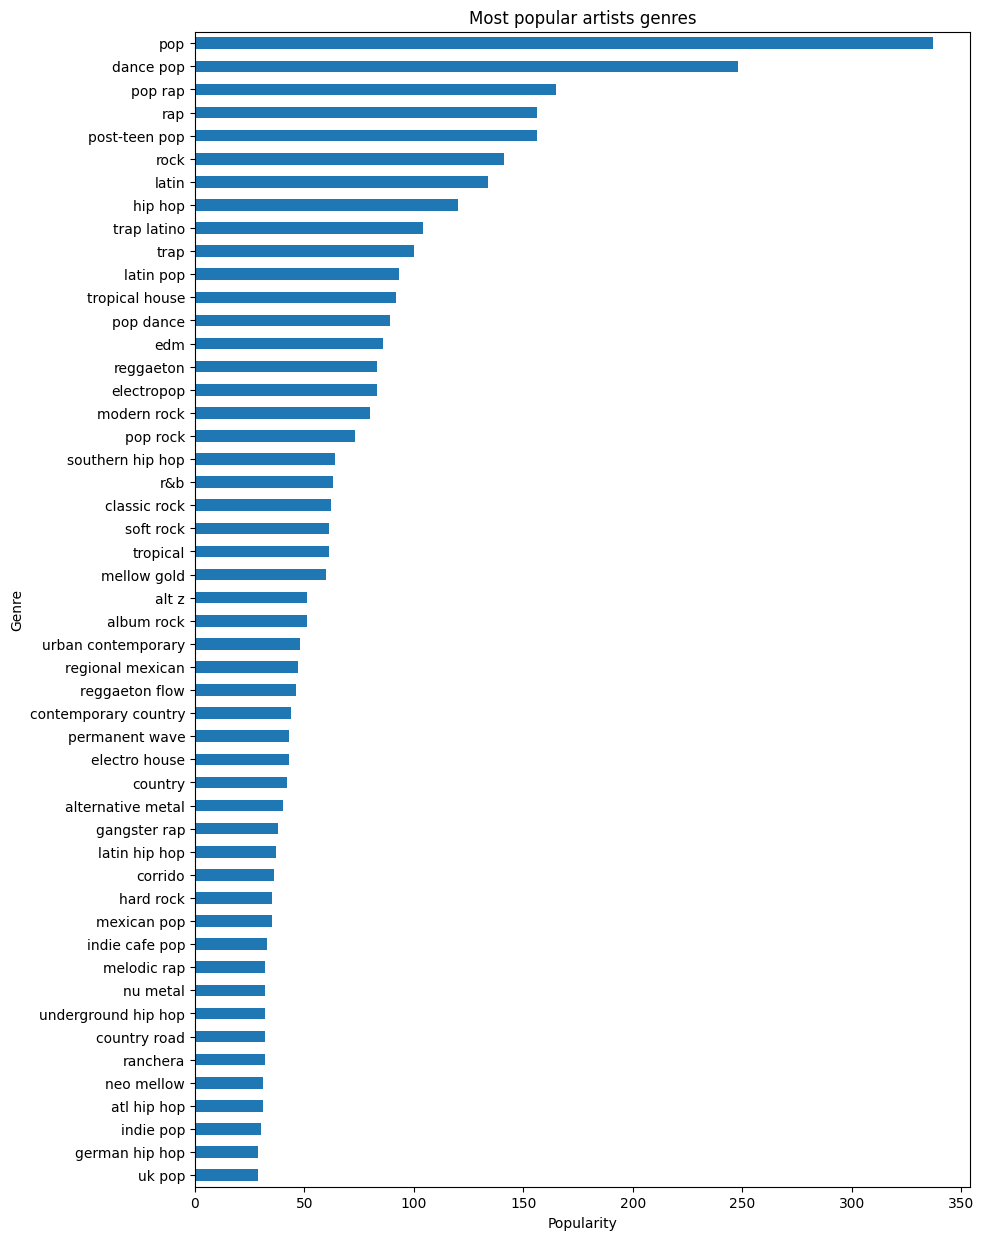

In [52]:
popular_genres_artists = (artists_df.explode("genres")
                            ).value_counts("genres")[:50].iloc[::-1]

popular_genres_artists.plot(kind="barh",
                            title ="Most popular artists genres",
                            xlabel="Popularity",
                            ylabel="Genre",
                            figsize=(10,15))

<Axes: title={'center': 'Most popular users genres'}, xlabel='Popularity', ylabel='Genre'>

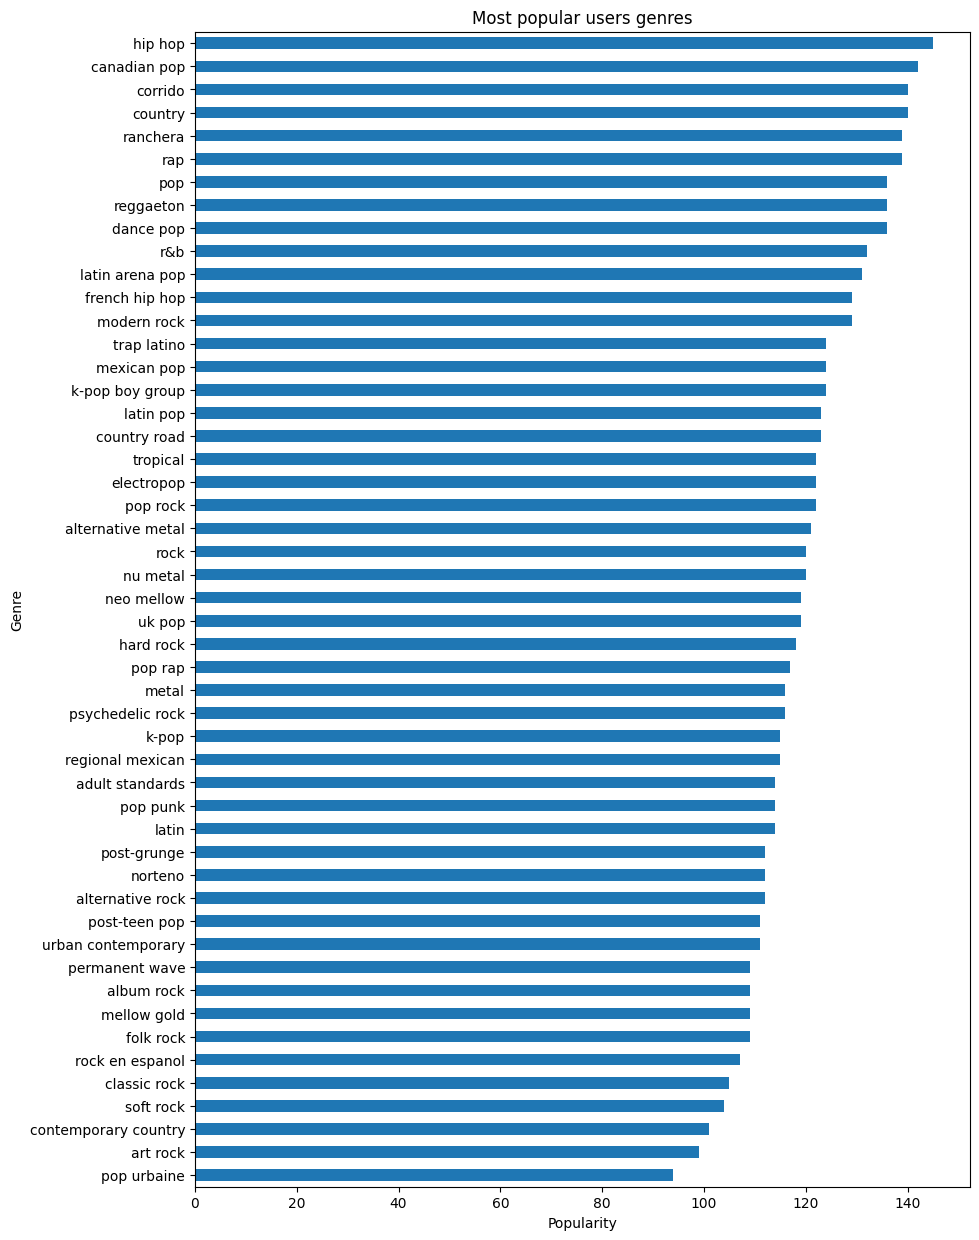

In [53]:
popular_genres_users = (users_df.explode("favourite_genres")
                          ).value_counts("favourite_genres")[:50].iloc[::-1]

popular_genres_users.plot(kind="barh",
                          title="Most popular users genres",
                          xlabel="Popularity",
                          ylabel="Genre", 
                          figsize=(10,15))

Mapa korelacji pomiędzy wybranymi atrybutami dla utworów.

<Axes: >

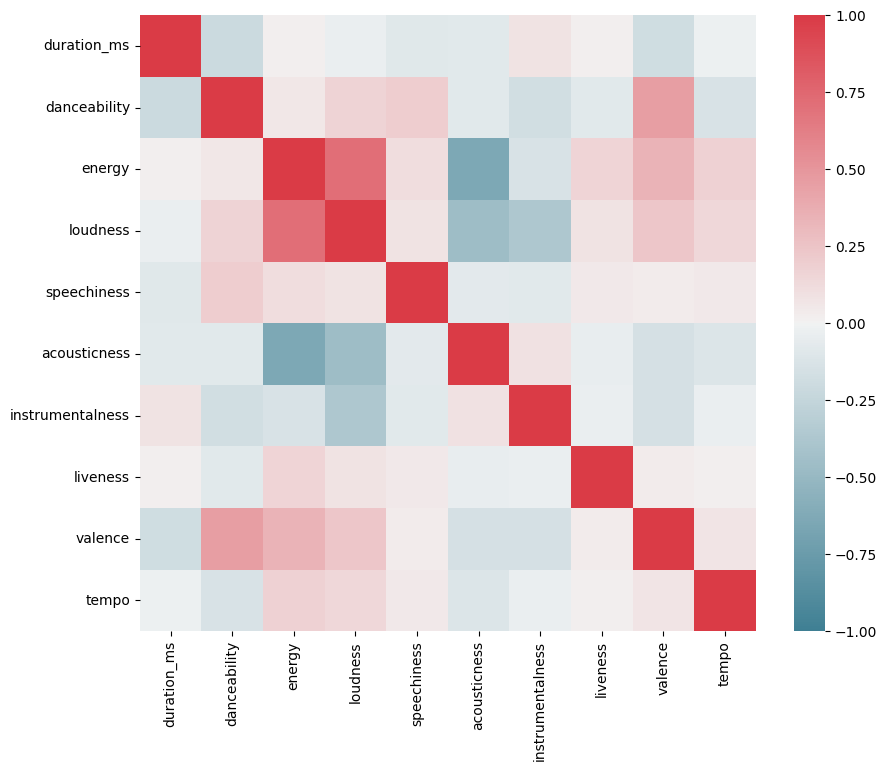

In [54]:
df = tracks_df[[
    "duration_ms",
    "danceability", "energy", 
    "loudness", "speechiness", "acousticness", 
    "instrumentalness", "liveness" , "valence", 
    "tempo"]]

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Mapa korelacji liczonej metodą spearmana.

<Axes: >

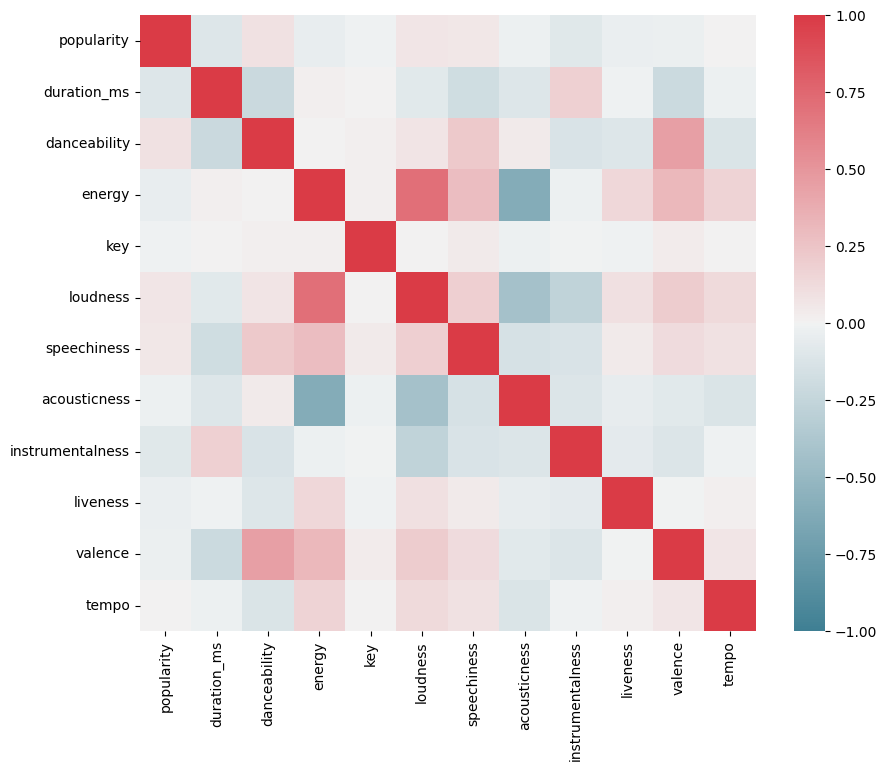

In [55]:
df = tracks_df.drop(columns=[
    "id",
    "name",
    "explicit",
    "id_artist",
    "release_date"
])

f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr(method='spearman')
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Wykres kołowy przedstawiający procent użytkowników premium.

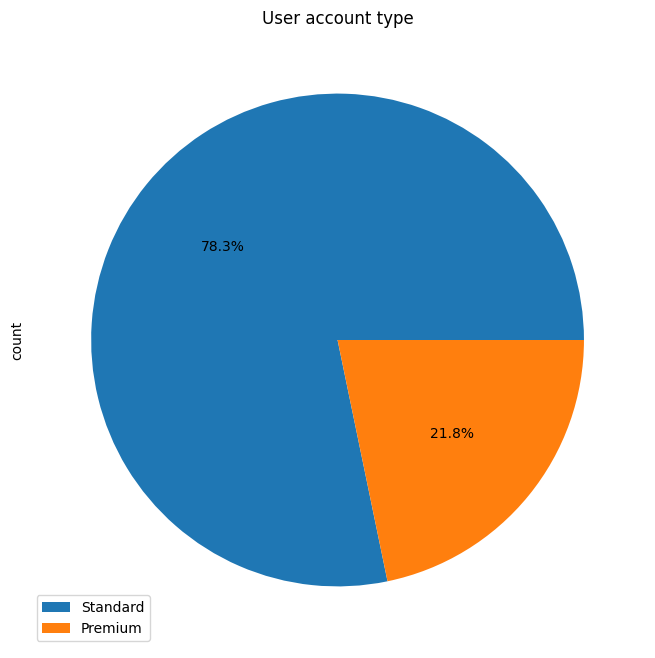

In [56]:
f, ax = plt.subplots(figsize=(10, 8))
users_df["premium_user"].value_counts().plot(kind="pie", 
                                             title="User account type",
                                             ax = ax,
                                             labels=None,
                                             autopct='%1.1f%%',
                                             )

ax.legend(loc=3, labels=["Standard", "Premium"])
plt.show()

Wykres przedstawiający 30 najczęściej pojawiających się utworów w sesjach.

<Axes: title={'center': 'Most popular track from sessions'}, xlabel='Popularity', ylabel='Title'>

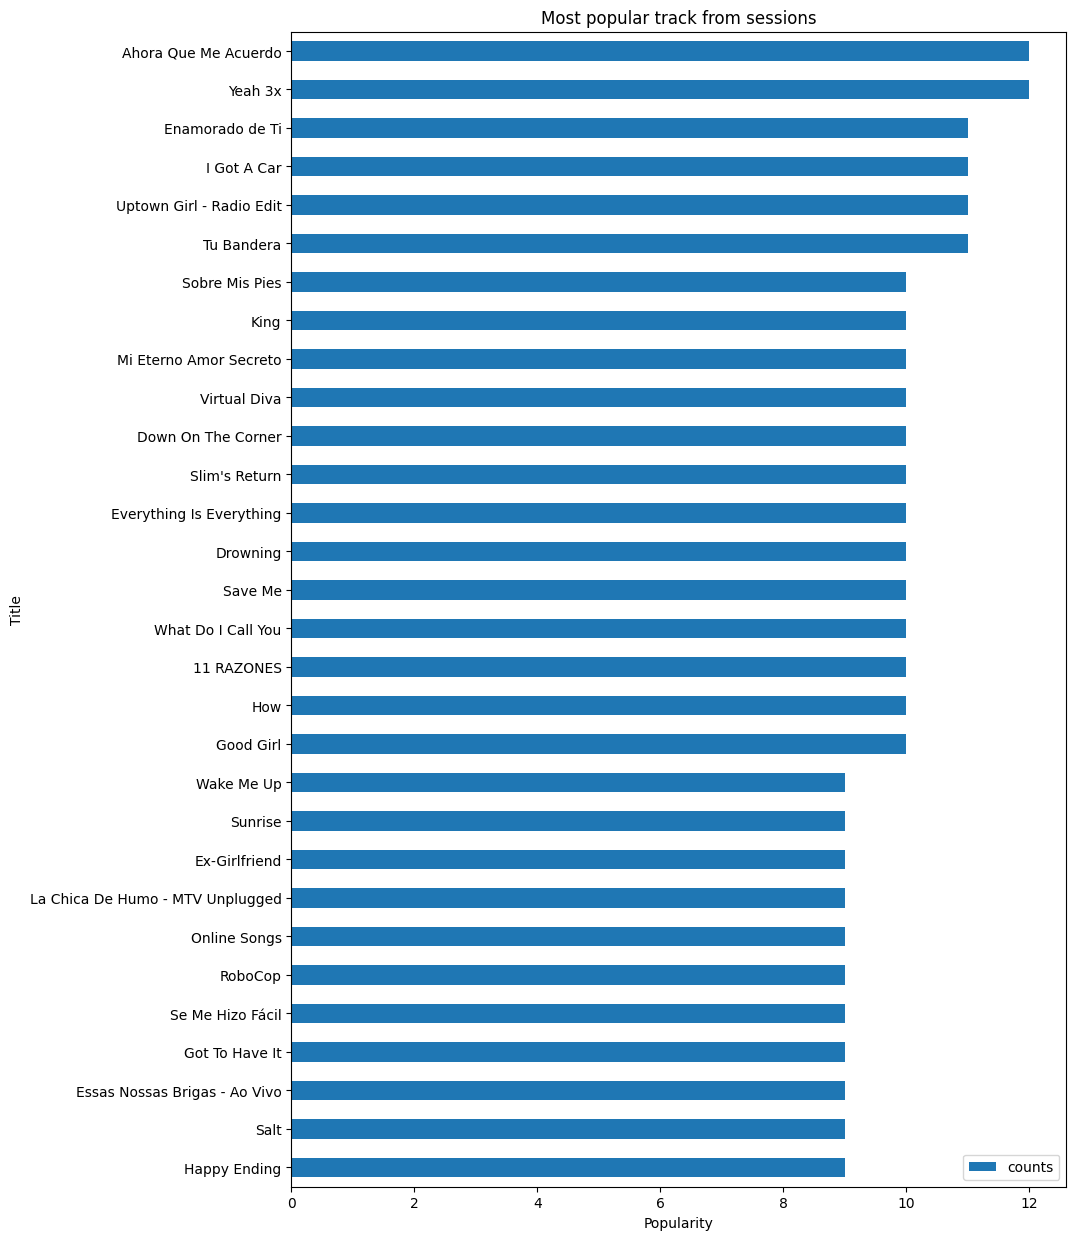

In [57]:
track_popularity = sessions_df[
    sessions_df["event_type"] == "play"
  ].value_counts("track_id").rename_axis('id').reset_index(name='counts')

track_popularity = track_popularity.merge(tracks_df, 
                       left_on="id", 
                       right_on="id")[["name", "counts"]][:30].iloc[::-1]

track_popularity.plot(kind="barh",
                        x = "name",
                        y = "counts",
                        title="Most popular track from sessions",
                        xlabel="Popularity",
                        ylabel="Title", 
                        figsize=(10,15))

Sprawdziliśmy jak liczba występień poszczególnych utworów koreluje z atrybutem popularity. Dla aktualnych danych współczynnik korelacji wynosi -0.008789, a więc atrybut nie wydaje się być skorelowany z realną popularnością.

In [58]:
track_popularity = sessions_df[
    sessions_df["event_type"] == "play"
  ].value_counts("track_id").rename_axis('id').reset_index(name='counts')
track_popularity = track_popularity.merge(tracks_df, 
                       left_on="id", 
                       right_on="id")[["popularity", "counts"]]
track_popularity.corr()

,popularity,counts
popularity,1.000000,-0.008789
counts,-0.008789,1.000000


Wykres słupkowy dla utworów powstałych w danym roku.

<Axes: title={'center': 'Tracks per year'}, xlabel='count', ylabel='year'>

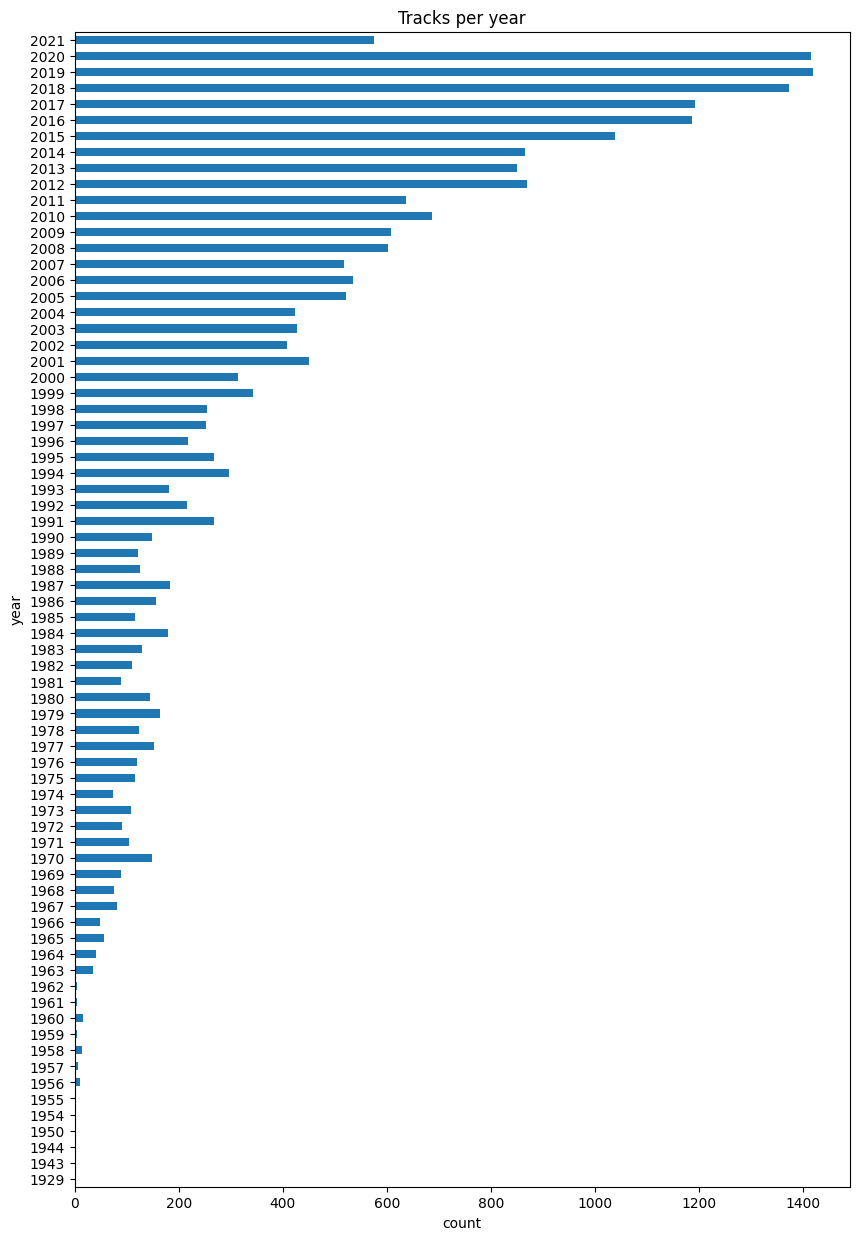

In [59]:
series = tracks_df["release_date"].map(lambda x: x[:4]).astype({"release_date" : int}).value_counts()
df = pd.DataFrame()
df["year"] = series.index
df["count"] = series.values

df.sort_values(by=["year"]).plot(
    x="year",
    y="count",
    kind="barh",
    legend=None,
    figsize=(10,15),
    title="Tracks per year",
    xlabel="count",
    ylabel="year"
)

Ruch w serwisie z podziałem na dni tygodnia.

<Axes: title={'center': 'Number sessions per day.'}, xlabel='day', ylabel='sessions number'>

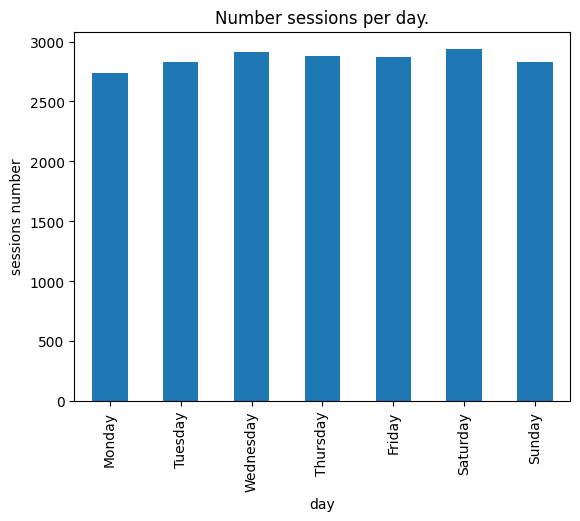

In [60]:
series = sessions_df.groupby("session_id").first()["timestamp"].map(lambda x: x.strftime('%A')).value_counts()

df = pd.DataFrame()
df["day"] = series.index
df["count"] = series.values

cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['day'] = pd.Categorical(df['day'], categories=cats, ordered=True)
df.sort_values(by=["day"]).plot(
    x="day",
    y="count",
    kind = "bar",
    legend=False,
    title="Number sessions per day.",
    xlabel="day",
    ylabel="sessions number"
)

Testy, czy zmienne niosą informacje o funkcji celu

In [61]:
def test_model(model,columns):
    counter = 0
    for session_id,row in sessions_df.groupby("session_id").first().iterrows():
        track = tracks_df[tracks_df['id'] == row['track_id']]
        x = track[columns]
        preds = model.predict(x)
        session_tracks = sessions_df[sessions_df['session_id'] == session_id].iloc[1:]['track_id']
        session_tracks = session_tracks[session_tracks.notnull()]
        for track in session_tracks:
            if track in preds:
                counter += 1
    return counter
        

    

In [62]:
column_list = ['popularity','duration_ms','explicit','danceability',
               'energy','key','loudness','speechiness',
                'acousticness', 'liveness','valence','tempo']
import random
df = pd.DataFrame(-1, index=column_list, columns=column_list)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

for column1 in column_list:
    for column2 in column_list:
        if df.at[column1,column2] == -1:
            columns = [column1] if column1 == column2 else [column1,column2]
            x = tracks_df[columns]
            y = tracks_df['id']
            knn = KNeighborsClassifier(n_neighbors=20)
            knn.fit(x,y)
            result = test_model(knn,columns)
            df.at[column1,column2] = result
            df.at[column2,column1] = result

KeyboardInterrupt: 

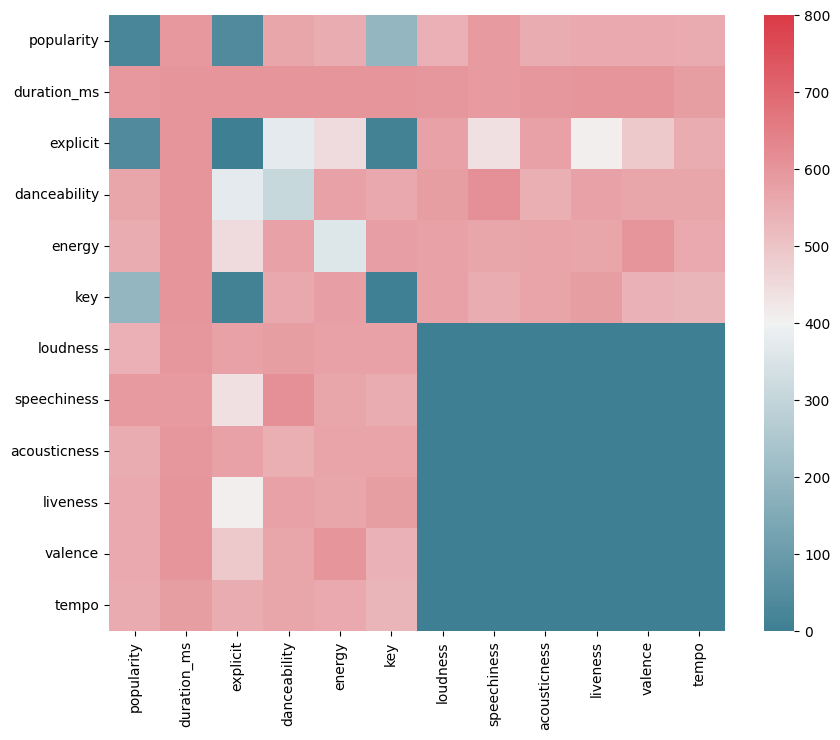

In [64]:
f, ax = plt.subplots(figsize=(10, 8))
heat = sns.heatmap(df,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=0, vmax=800.0,
    square=True, ax=ax)
fig = heat.figure
fig.savefig('heatmap.png')